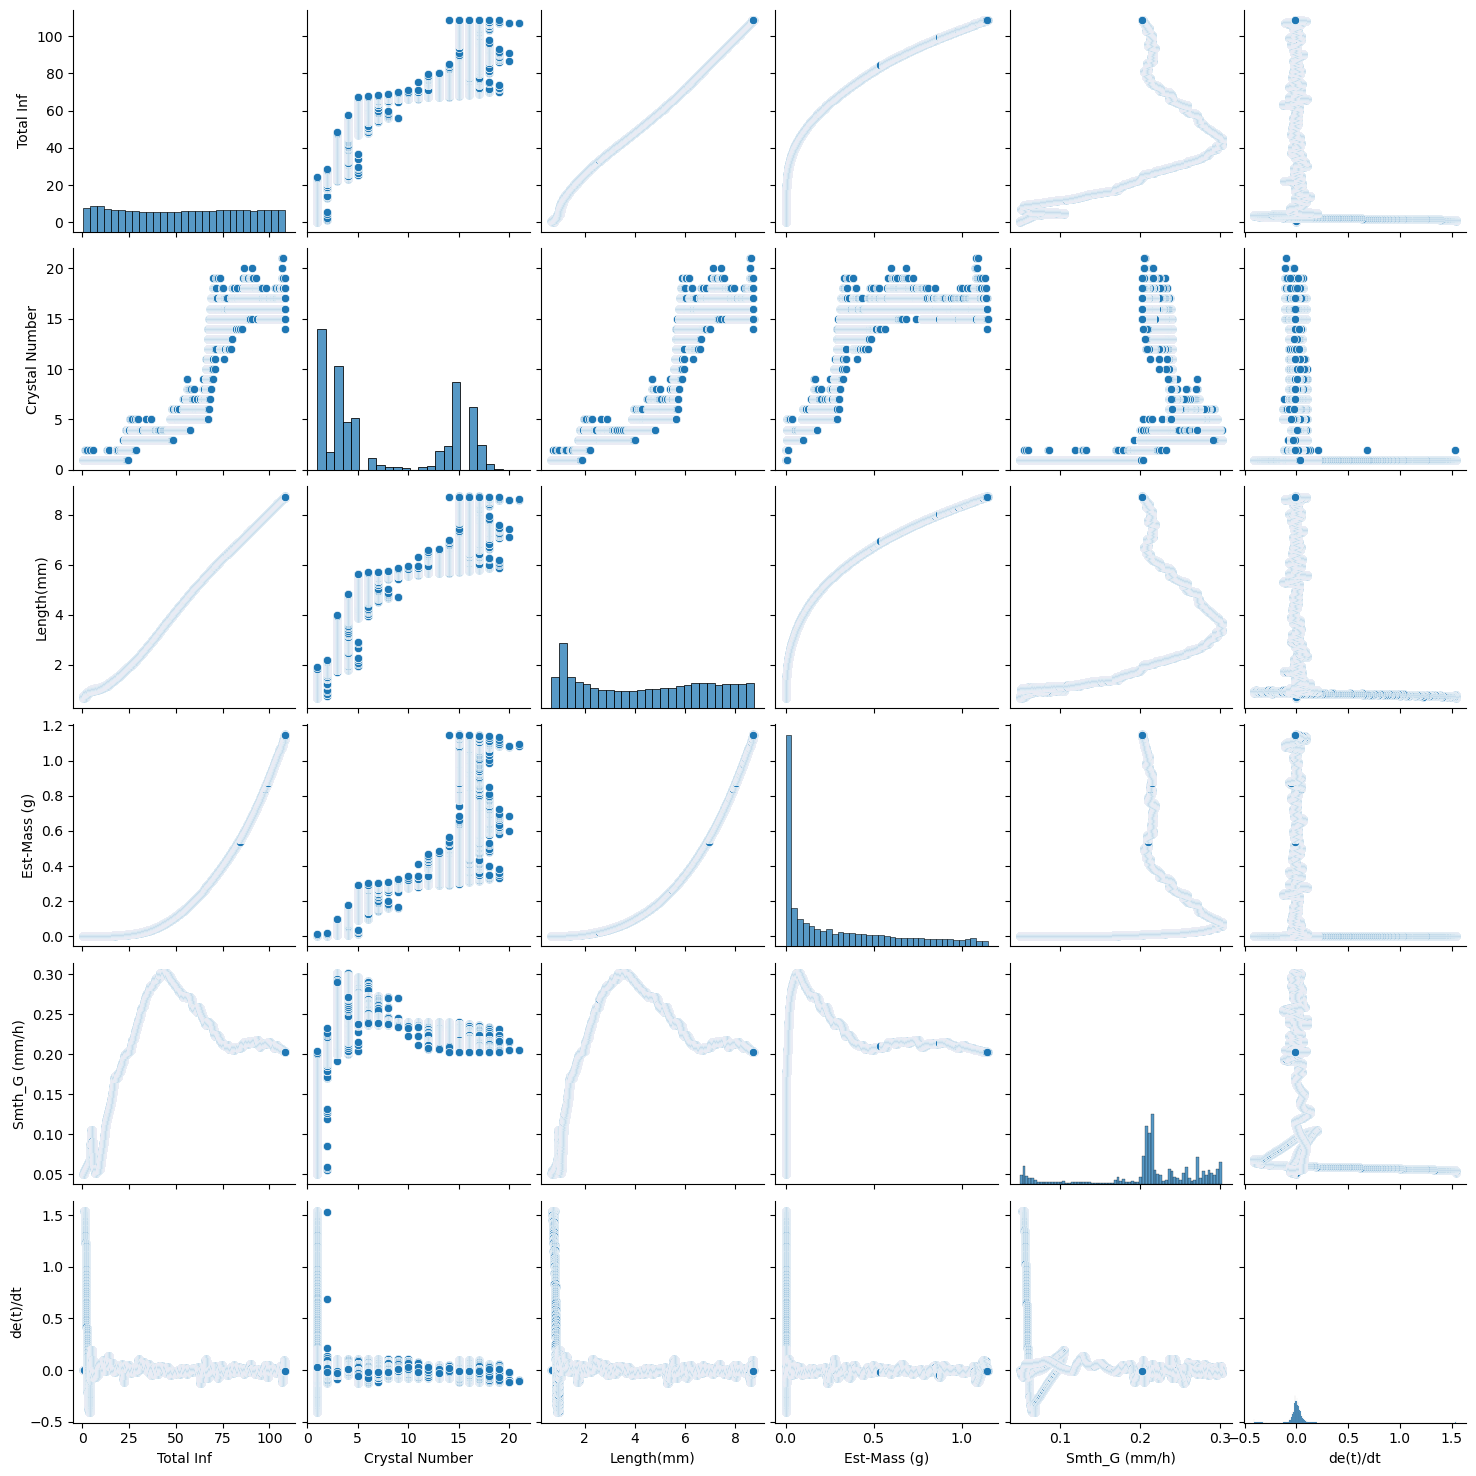

In [23]:
#filename = input('Enter filename\n')
filename = "/Users/yukiharuta/Downloads/2023-07-03 data.xlsx"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #データ表示のためのライブラリ

df = pd.read_excel(filename, index_col=0)

sns.pairplot(df) #データ表示
plt.show()

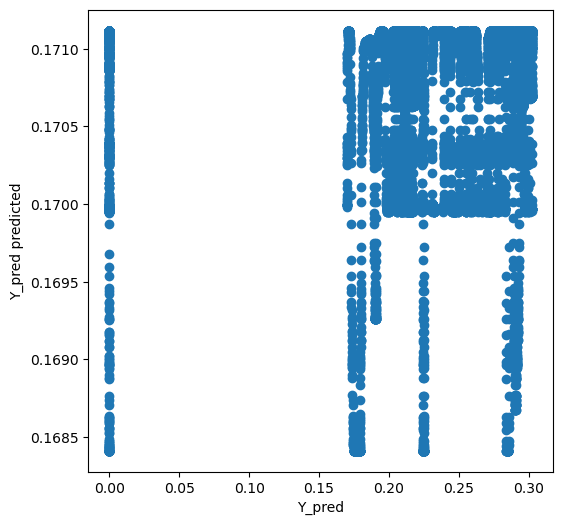

In [29]:
from sklearn.ensemble import RandomForestRegressor #ランダムフォレストを行うライブラリ
from sklearn.model_selection import train_test_split #データを分割するライブラリ
import numpy as np
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error

i_hour = 715
time_span = 5 * i_hour # first XX hrs dataset will be used for the training
time_jump = 2 * i_hour # the growth rate after XX hrs will be predicted

G = df['Smth_G (mm/h)'].to_list()
G_jump = []
for i in range(len(G)-time_jump):
    G_jump.append(G[time_jump+i])
for i in range(time_jump):
    G_jump.append(0)

df['Y_pred'] = G_jump
df_ = df.iloc[:len(G)-time_jump,:]

ans = 'Y_pred'
col = df_.columns.drop([ans])
X, Y = df[col], df[ans]

X_train, X_test, Y_train, Y_test = X.iloc[:time_span,:], X.iloc[time_span:,:], Y[:time_span], Y[time_span:]

# RF= RandomForestRegressor(n_estimators=200, max_depth=100)
RF= RandomForestRegressor()
RF.fit(X_train, Y_train)

Y_test_pred  = RF.predict(X_test)
Y_train_pred = RF.predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_test_pred)
plt.xlabel(ans)
plt.ylabel(ans+" predicted")
plt.show()

In [30]:
F=RF.feature_importances_ #Confirm the importance of each parameter
#make a table
# FI=pd.DataFrame([df.columns,F]).T
FI=pd.DataFrame([col,F]).T
FI.columns=["Parameter","Importance"]
FI

,Parameter,Importance
0,Total Inf,0.938711
1,Crystal Number,0.0
2,Length(mm),0.0
3,Est-Mass (g),0.0
4,Smth_G (mm/h),0.053949
5,de(t)/dt,0.007339


In [47]:
import pandas as pd
import numpy as np

test_array = []
values = []

for i in range(len(col)):
    val = float(input('input: ' + col[i] + '\n '))
    values.append(val)
    
test_array.append(values)
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
test_frame

input: R_x2 (mm/h) e(t)+SV
  0.14
input: L_x (mm)
  3
input: Inf_0 (mL/h)
  2.7


,R_x2 (mm/h) e(t)+SV,L_x (mm),Inf_0 (mL/h)
0,0.14,3.0,2.7


In [48]:
Y_test_prediction = RF.predict(test_frame)
Y_test_prediction

array([2.85550738])

In [83]:
test_array.append([0.14,3.0,2.7])
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
Y_test_prediction = RF.predict(test_frame)
float(Y_test_prediction[0])

2.8840151162711196